In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

## Train Dataset

In [2]:
df=pd.read_csv('/Users/ismaelgarciainigo/Desktop/NEOLAND BOOTCAMP/Health_insurance/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
def eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

In [4]:
eda(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
Age,0,0.0,int64,381109,38.822584,36.0,20,85
Annual_Premium,0,0.0,float64,381109,30564.389581,31669.0,2630,540165
Driving_License,0,0.0,int64,381109,0.997869,1.0,0,1
Gender,0,0.0,object,381109,NaN,NaN,Female,Male
Policy_Sales_Channel,0,0.0,float64,381109,112.034295,133.0,1,163
Previously_Insured,0,0.0,int64,381109,0.458210,0.0,0,1
Region_Code,0,0.0,float64,381109,26.388807,28.0,0,52
Response,0,0.0,int64,381109,0.122563,0.0,0,1
Vehicle_Age,0,0.0,object,381109,NaN,NaN,1-2 Year,> 2 Years
Vehicle_Damage,0,0.0,object,381109,NaN,NaN,No,Yes


In [5]:
for i in df[['Gender','Vehicle_Damage','Vehicle_Age']]:
    x=pd.get_dummies(df[i],prefix=i)
    df=pd.concat([df,x],axis=1)
    del df[i]

In [6]:
df.drop(['Gender_Male','Vehicle_Damage_No'],axis=1,inplace=True)

In [7]:
df['class']=df.Response
df.drop('Response',axis=1,inplace=True)


In [8]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,class
0,1,44,1,28.0,0,40454.0,26.0,217,0,1,0,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,0,1,0,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,0,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,1,0,0,1,0,0


## Data visualization

### Fees with respect of the Age and class separation

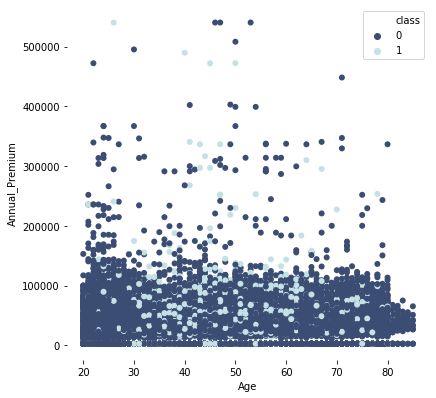

In [9]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Age", y="Annual_Premium",
                hue="class",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)
plt.show()


### Region distribution by Age and class

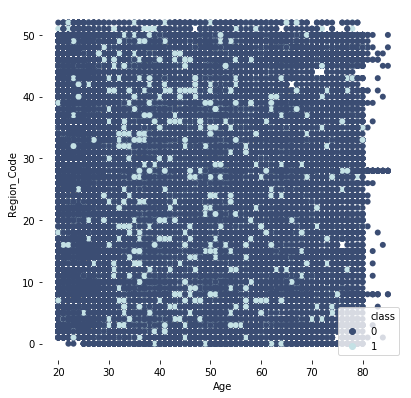

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Age", y="Region_Code",
                hue="class",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)


plt.show()



### Former clients by Age and Sales channel conduct with class distribution

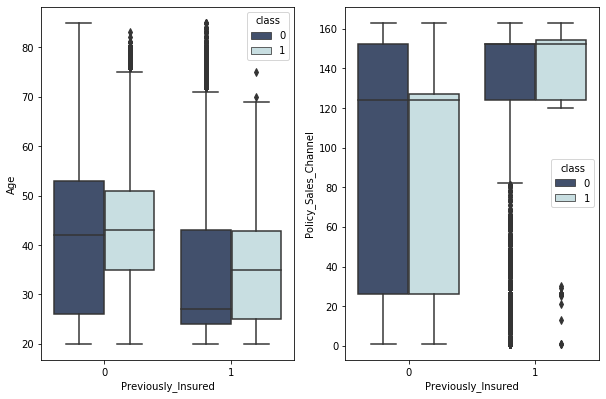

In [11]:
plt.subplots(figsize=(10,6.5))
plt.subplot(1,2,1)
sns.boxplot(x="Previously_Insured", y="Age",hue="class", palette="ch:r=-.2,d=.3_r",data=df)
plt.subplot(1,2,2)
sns.boxplot(x="Previously_Insured", y="Policy_Sales_Channel",hue="class", palette="ch:r=-.2,d=.3_r",data=df)

plt.show()

### Damaged cars with previous insurance

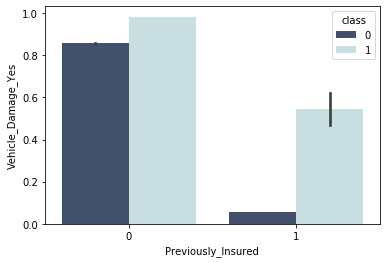

In [12]:
sns.barplot(x="Previously_Insured", y="Vehicle_Damage_Yes",
            hue="class", palette="ch:r=-.2,d=.3_r",
            data=df)
plt.show()

### Age distribution by car's age & Gender

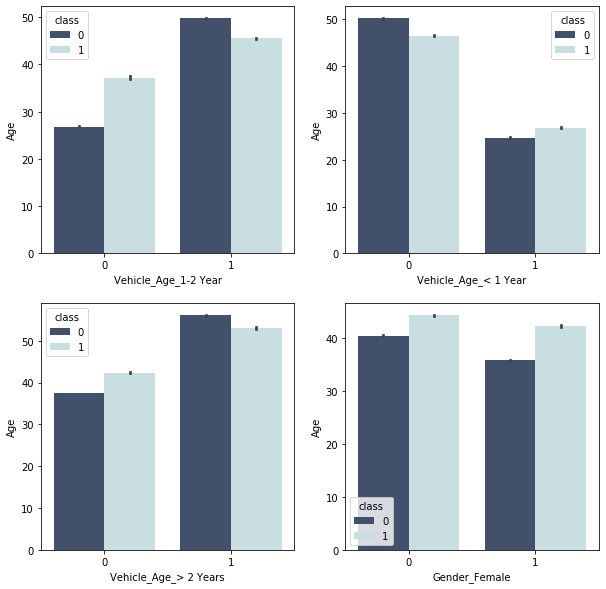

In [13]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x="Vehicle_Age_1-2 Year", y="Age",hue="class", palette="ch:r=-.2,d=.3_r",data=df)
plt.subplot(2,2,2)
sns.barplot(x="Vehicle_Age_< 1 Year", y="Age",hue="class", palette="ch:r=-.2,d=.3_r",data=df)
plt.subplot(2,2,3)
sns.barplot(x="Vehicle_Age_> 2 Years", y="Age",hue="class", palette="ch:r=-.2,d=.3_r",data=df)
plt.subplot(2,2,4)
sns.barplot(x="Gender_Female", y="Age",hue="class", palette="ch:r=-.2,d=.3_r",data=df)
plt.show()

In [14]:
df[['Age','Annual_Premium','Vintage']]=StandardScaler().fit_transform(df[['Age','Annual_Premium','Vintage']])


In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,class
0,0.333777,1,28.0,0,0.574539,26.0,0.748795,0,1,0,0,1,1
1,2.396751,1,3.0,0,0.172636,26.0,0.342443,0,0,1,0,0,0
2,0.527181,1,28.0,0,0.449053,26.0,-1.521998,0,1,0,0,1,1
3,-1.148985,1,11.0,1,-0.113018,152.0,0.581474,0,0,0,1,0,0
4,-0.633242,1,41.0,1,-0.178259,152.0,-1.378580,1,0,0,1,0,0


## Classification Modeling

In [17]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

/Users/ismaelgarciainigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Feature ranking:
1. feature 6 (0.269780)
2. feature 4 (0.243624)
3. feature 0 (0.152813)
4. feature 2 (0.107485)
5. feature 8 (0.072895)
6. feature 5 (0.071467)
7. feature 3 (0.052174)
8. feature 10 (0.014794)
9. feature 9 (0.007477)
10. feature 7 (0.004426)
11. feature 11 (0.002603)
12. feature 1 (0.000463)


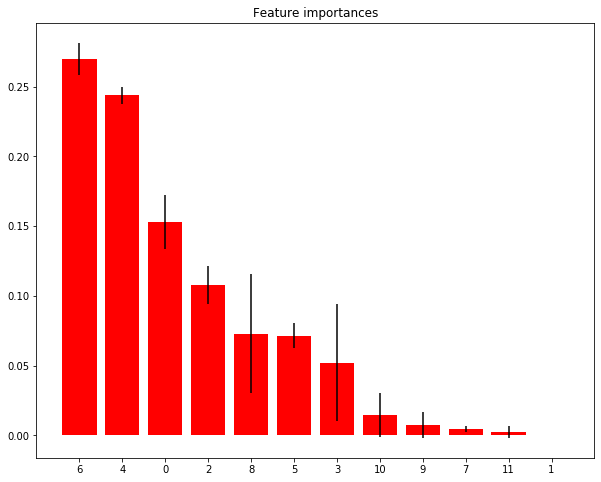

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
visual_columns=[print(i,j) for i,j in enumerate(df.columns)]
visual_columns

0 Age
1 Driving_License
2 Region_Code
3 Previously_Insured
4 Annual_Premium
5 Policy_Sales_Channel
6 Vintage
7 Gender_Female
8 Vehicle_Damage_Yes
9 Vehicle_Age_1-2 Year
10 Vehicle_Age_< 1 Year
11 Vehicle_Age_> 2 Years
12 class


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [20]:
from collections import Counter

In [21]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [22]:
Counter(y_resampled)

Counter({1: 334399, 0: 334399})

# Random Forest Classifier

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled)
yhat=[]
y_true = []
for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    clasificador = RandomForestClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    y_true.extend(y_test)
print(classification_report(y_true,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.942     0.866     0.902    334399
           1      0.876     0.946     0.910    334399

    accuracy                          0.906    668798
   macro avg      0.909     0.906     0.906    668798
weighted avg      0.909     0.906     0.906    668798



In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Neural network

In [26]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1500, activation='sigmoid'),
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(2, activation='softmax') #el 2 es necesario porque son 2 clases 
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X_resampled,y_resampled, epochs=20, verbose=1)

Epoch 1/20
20900/20900 [==============================] - 138s 7ms/step - loss: 0.4365 - accuracy: 0.7854
Epoch 2/20
20900/20900 [==============================] - 144s 7ms/step - loss: 0.4222 - accuracy: 0.7964
Epoch 3/20
20900/20900 [==============================] - 155s 7ms/step - loss: 0.4196 - accuracy: 0.7980
Epoch 4/20
20900/20900 [==============================] - 149s 7ms/step - loss: 0.4178 - accuracy: 0.7995
Epoch 5/20
20900/20900 [==============================] - 149s 7ms/step - loss: 0.4166 - accuracy: 0.8008
Epoch 6/20
20900/20900 [==============================] - 150s 7ms/step - loss: 0.4155 - accuracy: 0.8016
Epoch 7/20
20900/20900 [==============================] - 1477s 71ms/step - loss: 0.4143 - accuracy: 0.8024
Epoch 8/20
20900/20900 [==============================] - 152s 7ms/step - loss: 0.4138 - accuracy: 0.8027
Epoch 9/20
20900/20900 [==============================] - 147s 7ms/step - loss: 0.4140 - accuracy: 0.8025
Epoch 10/20
20900/20900 [===================

# Test Dataset

In [29]:
df1=pd.read_csv('/Users/ismaelgarciainigo/Desktop/NEOLAND BOOTCAMP/Health_insurance/test.csv')
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [30]:
for i in df1[['Gender','Vehicle_Damage','Vehicle_Age']]:
    x=pd.get_dummies(df1[i],prefix=i)
    df1=pd.concat([df1,x],axis=1)
    del df1[i]

In [31]:
df1.drop(['Gender_Male','Vehicle_Damage_No'],axis=1,inplace=True)

In [32]:
df1.drop('id',axis=1,inplace=True)

In [33]:
df1[['Age','Annual_Premium','Vintage']]=StandardScaler().fit_transform(df1[['Age','Annual_Premium','Vintage']])

In [34]:
df1

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,-0.890089,1,11.0,1,0.310492,152.0,-1.211054,0,0,0,1,0
1,0.079795,1,28.0,0,0.191048,7.0,-0.517782,0,1,1,0,0
2,0.532408,1,28.0,0,0.562126,124.0,0.534079,0,1,1,0,0
3,-0.954748,1,27.0,1,0.403143,152.0,0.390643,0,1,0,1,0
4,-0.760771,1,28.0,1,1.686159,152.0,1.705469,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,-0.825430,1,37.0,1,0.020204,152.0,-1.175195,1,0,0,1,0
127033,-0.049523,1,28.0,0,-0.107679,122.0,0.127678,1,1,1,0,0
127034,-1.148725,1,46.0,1,-0.042646,152.0,-0.960042,0,0,0,1,0
127035,2.084224,1,28.0,1,1.909113,26.0,1.322974,0,0,1,0,0


## Dataset array

In [35]:
X1=np.array(df1)

# Neural network prediction

In [36]:
prediction_neural=model.predict(X1)

Counter({0: 77708, 1: 49329})


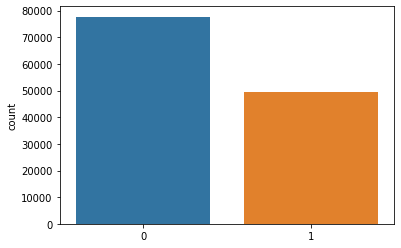

In [37]:
lista_predicciones=[np.argmax(i) for i in prediction_neural]
print(Counter(lista_predicciones))
sns.countplot(lista_predicciones)
plt.show()

# Random Forest prediction

In [38]:
yhat1=clasificador.predict(X1)
yhat1

array([0, 1, 1, ..., 0, 0, 0])

Counter({0: 84855, 1: 42182})


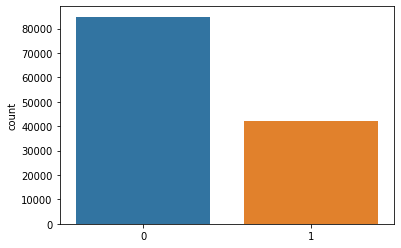

In [39]:
sns.countplot(yhat1)
print(Counter(yhat1))
plt.show()